# Title: Heart Disease Prediction

`Author:` [Ammar Zafar] (https://www.linkedin.com/in/ammar-zafar-7345a2156/)\
`Date:` 12.May.2024\
`Dataset:` [Heart Disease UCI] (https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp chest` pain type 
  1. typical angina, 
  2. atypical angina, 
  3. non-anginal, 
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
-- `Values:` [normal, stt abnormality, lv hypertrophy]
* `thalach:` maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak:` ST depression induced by exercise relative to rest
* `slope:` the slope of the peak exercise ST segment
* `ca:` number of major vessels (0-3) colored by fluoroscopy
* `thal:` [normal; fixed defect; reversible defect]
* `num:` the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objective:

We will fill this after doing some exploratory data analysis (EDA).

### Import Libraries

Let's start the project by importing all the libraries that we will need in this project.


In [1]:
# import Libraries

# To handle the dataset
import pandas as pd
import numpy as np

# To visualize the dataset 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 

# for machine learning
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# for classifications tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
# for metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,mean_squared_error,r2_score,mean_absolute_error

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
# Load the data from csv file placed locally in our pc
df = pd.read_csv("heart_disease_uci.csv")

# print the first five rows of the dataset
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

### Explore Each Column

In [3]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# Data shape
df.shape

(920, 16)

In [5]:
# id column
df["id"].min(),df["id"].max()

(1, 920)

In [6]:
# age column
df["age"].min(),df["age"].max()

(28, 77)

<AxesSubplot:xlabel='age', ylabel='Count'>

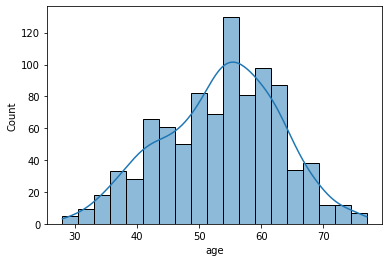

In [7]:
# draw a histogram to see the distribution of age column
sns.histplot(df["age"],kde=True)

Mean of age column is :  53.51086956521739
Median of age column is :  54.0
Mode of age column is :  54


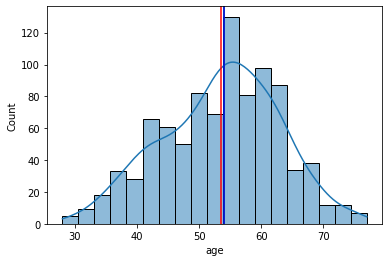

In [8]:
# plot the mean, median and mode of age column using sns
sns.histplot(df["age"],kde = True)
plt.axvline(df["age"].mean(),color = "red")
plt.axvline(df["age"].median(),color = "green")
plt.axvline(df["age"].mode()[0],color= "blue")

# print the value of mean,median and mode of age column
print("Mean of age column is : ",df["age"].mean())
print("Median of age column is : ",df["age"].median())
print("Mode of age column is : ",df["age"].mode()[0])

Let's explore the gender based distribution of the dataset for age column

In [9]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df,x= "age",color = "sex")
fig.show()

In [10]:
# find the values of sex column
df["sex"].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

In [11]:
# Calculate the percentages of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count+female_count

# calculate percentages
male_percentage = (male_count/total_count) * 100
female_percentage = (female_count/total_count)*100 

# Display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count-female_count)/female_count) *100
print(f"Males are:{difference_percentage:.2f}% more than females in the data.")


Male percentage in the data: 78.91%
Female percentage in the data: 21.09%
Males are:274.23% more than females in the data.


In [12]:
# find the values count of age column grouping by sex column

df.groupby("sex")["age"].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: age, Length: 91, dtype: int64

In [13]:
# Lets deal with dataset column
# find the unique values in dataset column
df["dataset"].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [14]:
# find unique values column in dataset
df["dataset"].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [15]:
# plot the count plot of dataset column
# sns.countplot(data=df, x="dataset",hue="sex")

# better plots with plotly
fig = px.bar(df,x= "dataset",color="sex")
fig.show()

# print the values count of dataset column grouped by sex
print(df.groupby("sex")["dataset"].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: dataset, dtype: int64


In [16]:
# make a plot of age column using plotly and coloring this by dataset column.

fig = px.histogram(data_frame=df,x="age",color="dataset")
fig.show()

# print the mean,median and mode of age column grouped by dataset column
print(df.groupby("dataset")["age"].mean())
print("---------------------------------")
print(df.groupby("dataset")["age"].median())
print("---------------------------------")
print(df.groupby("dataset")["age"].agg(pd.Series.mode))
print("------------------------------------")

dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
---------------------------------
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
---------------------------------
dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
------------------------------------


#### Lets explore Cp (Chest pain) column:


In [17]:
# value count of cp column
df["cp"].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [18]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df,x= "age",color= "cp")
fig.show()


#### Let's explore the trestbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg

`Write here, what will happen if the blood pressure is high or low and then you can bin the data based on those values`

In [19]:
# find the value counts of trestbps column
df["trestbps"].describe()


count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [20]:
# lets summarize the age column
df["age"].describe().T

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

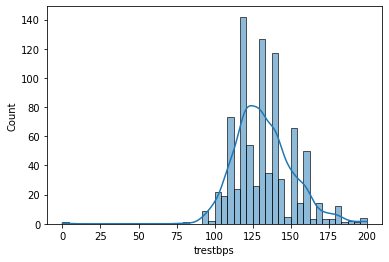

In [21]:
# create a histplot of trestbps column
sns.histplot(df["trestbps"],kde=True)

# Deal With Missing Values
- We are going to make a function to deal with missing values 

In [22]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [23]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [24]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [25]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [26]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.261618497109827 

RMSE = 17.272011072078097 

R2 = 0.06854128028065731 

Missing Values chol : 3.26%
MAE = 44.66623595505617 

RMSE = 62.83763137973717 

R2 = 0.6872061122451842 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 80.12 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 66.3 accuracy

Missing Values thalch : 5.98%
MAE = 16.623872832369944 

RMSE = 21.481797792926574 

R2 = 0.3289875748090899 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 80.35 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5586918604651163 

RMSE = 0.7866319837808381 

R2 = 0.41047646633928747 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 64.52 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



## **Dealing with Outliers**

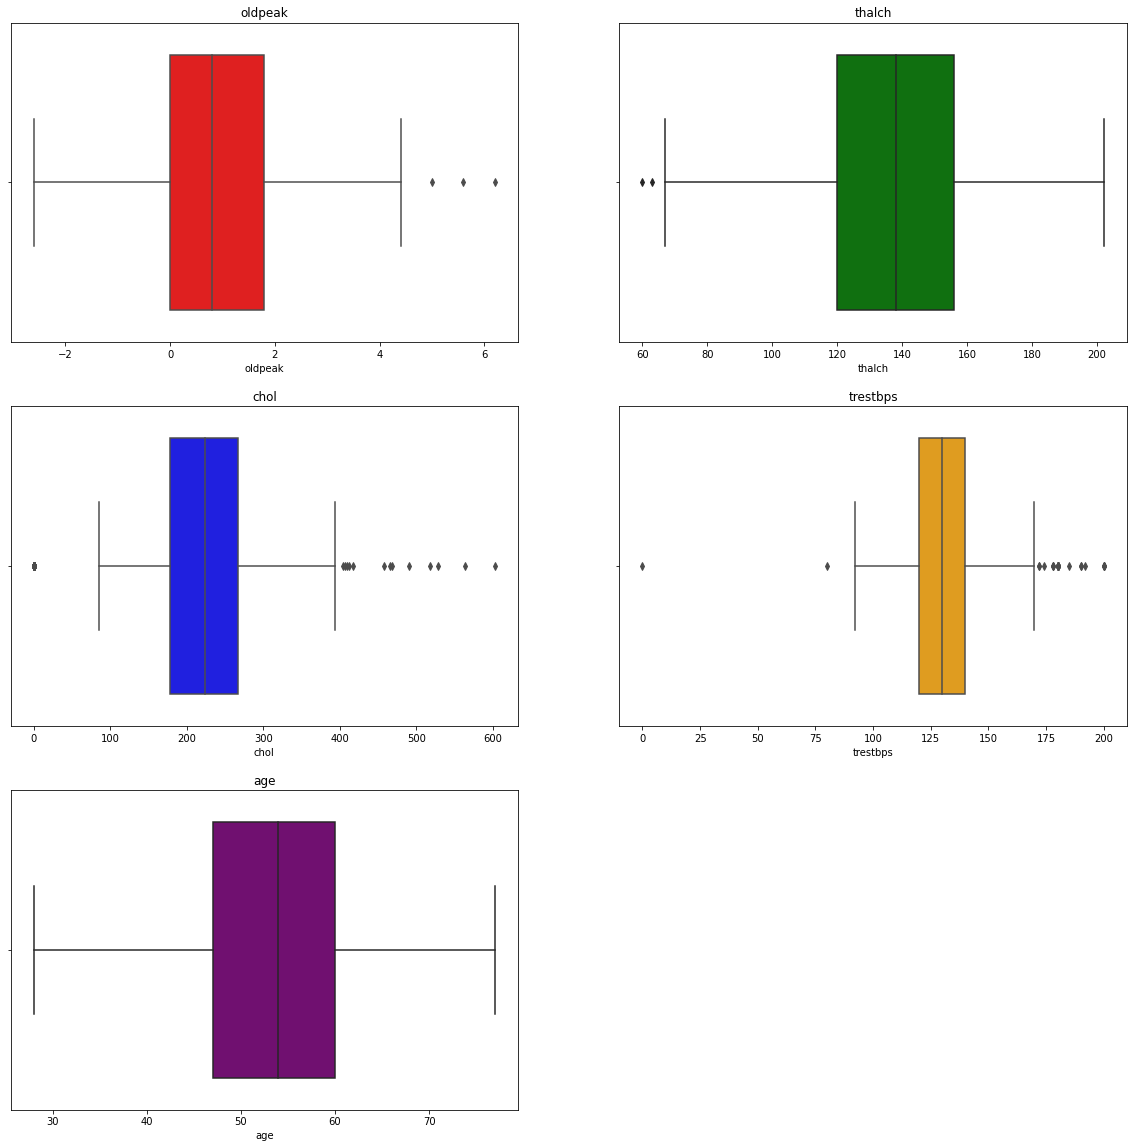

In [27]:
# Create box plot for all numeric columns using for loop and and subplot
plt.figure(figsize=(20, 20))


colors = ["red", "green", "blue", "orange", "purple"]

for i,col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df[col], color=colors[i])
    plt.title(col)
    
plt.show()

In [28]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df,y="age")
fig.show()

fig = px.box(data_frame=df, y = "trestbps")
fig.show()

fig = px.box(data_frame=df,y = "chol")
fig.show()

fig = px.box(data_frame=df,y= "thalch")
fig.show()

fig = px.box(data_frame=df,y = "oldpeak")
fig.show()

In [29]:
# print the row from df where trestbps value is 0
df[df["trestbps"] == 0]

# remove this row from data
df = df[df["trestbps"] != 0]

----------------------------------------------

# **Machine Learning**

In [30]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [31]:
df["num"].value_counts()

0    411
1    265
2    109
3    106
4     28
Name: num, dtype: int64

The Target column is "num" which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are:[0,1,2,3,4], which states that there are 5types of heart diseases.

- 0 = no heart disease
- 1 = mild heart disease
- 2 = moderate heart disease
- 3 = severe heart disease
- 4 = critical heart disease

In [32]:
# Split the data into X and y
X = df.drop("num", axis=1)
y = df["num"]

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate encoder for all object and cat columns and inverse transform at the end
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass  # Continue with other numerical features
    
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shape of training set is {}'.format(X_train.shape))
print('Shape of testing set is {}'.format(X_test.shape))

Shape of training set is (643, 15)
Shape of testing set is (276, 15)


Enlist all the models that we will use to predict the heart disease.These models should be classifiers for multi-class classification

1. Logistic Regression
2. KNN
3. Decision Tree
4. NB
5. SVM
6. Random Forest
7. GradientBoosting Classifier
8. XGBoost
9. AdaBoost
10. LightGBM

In [33]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# import pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,mean_squared_error,r2_score,mean_absolute_error


In [34]:
# create a list of models to evaluate
models = [
    ("LogisticRegression",LogisticRegression(random_state=42)),
    ("KNN",KNeighborsClassifier()),
    ("Support Vector Machine",SVC(random_state=42)),
    ("DecisionTreeClassifier",DecisionTreeClassifier(random_state=42)),
    ("RandomForestClassifier",RandomForestClassifier(random_state=42)),
    ("AdaBoostClassifier",AdaBoostClassifier(random_state=42)),
    ("GradientBoostingClassifier",GradientBoostingClassifier(random_state=42)),
    ("XGBClassifier",XGBClassifier(random_state=42)),
    ("LGBMClassifier",LGBMClassifier(random_state=42)),
    ("Naive Bayes",GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name,model in models:
    # create a pipeline for each model
    pipeline = Pipeline([
        # ("Imputer", SimpleImputer(strategy="most_frequent")),
       # ("encoder",OneHotEncoder(handle_unknown="ignore")),
        ("model",model)
    ])
    
    # perform cross validation
    scores = cross_val_score(pipeline,X_train,y_train,cv=5)
    
    # calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train,y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test,y_pred)
    
    # print the performance metrics
    print("Model:",name)
    print("Cross-Validation Accuracy:",mean_accuracy)
    print("Test Accuracy:",accuracy)
    print()
    
    # check if the current model has the best accuracy 
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
        
    # Retrieve the best model
    print("Best Model is:",best_model)
    
    # save the best model
    import pickle
    pickle.dump(best_model,open("heart_disease_model.pkl","wb"))
    



Model: LogisticRegression
Cross-Validation Accuracy: 0.5100532945736435
Test Accuracy: 0.5108695652173914

Best Model is: Pipeline(steps=[('model', LogisticRegression(random_state=42))])
Model: KNN
Cross-Validation Accuracy: 0.5738977713178295
Test Accuracy: 0.6014492753623188

Best Model is: Pipeline(steps=[('model', KNeighborsClassifier())])
Model: Support Vector Machine
Cross-Validation Accuracy: 0.5754481589147287
Test Accuracy: 0.5869565217391305

Best Model is: Pipeline(steps=[('model', KNeighborsClassifier())])
Model: DecisionTreeClassifier
Cross-Validation Accuracy: 0.611155523255814
Test Accuracy: 0.6231884057971014

Best Model is: Pipeline(steps=[('model', DecisionTreeClassifier(random_state=42))])
Model: RandomForestClassifier
Cross-Validation Accuracy: 0.6811894379844962
Test Accuracy: 0.6594202898550725

Best Model is: Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])
Model: AdaBoostClassifier
Cross-Validation Accuracy: 0.6144016472868217
Test Accuracy: 

#### Outputs:
1. The minimum age to have a heart disease starts 28years old.
2. Most of the people get heart disease at the age of 53-54 years.
3. Most of the males and females are getting heart disease at the age of 54-55years old.
4. Male percentage in the data: 78.91%
5. Female percentage in the data: 21.09%
6. Males are:274.23% more than females in the data.
7. We have highest number of people from cleveland (304) and lowest from switzerland (123).
   1. The highest number of females in this dataset are from cleveland (97) and lowest from VA LongBeach (6).
   2. The highest number of males in this dataset are from Hungary (212) and lowest from Switzerland (113).
8. The mean of dataset of age column Cleveland (54.351974) Hungary (47.894198) Switzerland (55.317073) & VA Long Beach (59.350000)
9. The median of dataset of age column Cleveland (55.5) Hungary (49.0) Switzerland (56.0) & VA Long Beach (60.0).
10. The mode of dataset of age column Cleveland 58 Hungary (54) Switzerland (61) & VA Long Beach [62, 63]